# nmi : fall 2023
## lecture 24x


### sauer, 2nd ed, section 8.1 code problem 5.b



note: c5.a with dataset x1.a is on the final.

#### problem statement


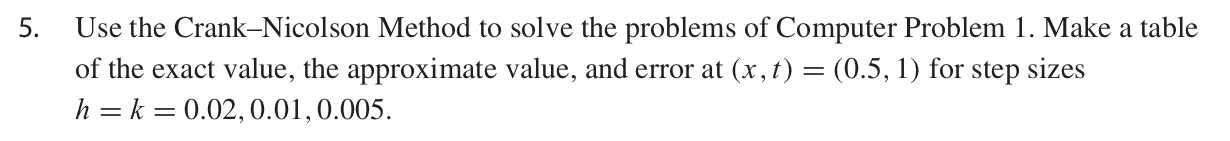

#### data set


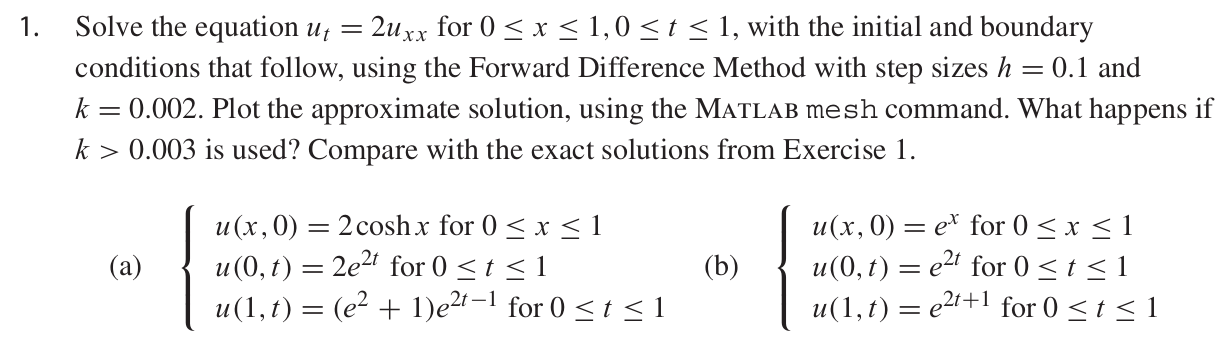

##### code

this example does crank-nicolson and plots for first $h=k=0.02$. making the table of data at $(x,t) = (0.5,1)$, thats all you.
</br></br>

theres examples of that kind of loop in previous lecture material or its fine if you just run your code 3x. just get me plots and the data!
</br></br>

also, im expecting python code but if you really wanna be edgy, do it with matlab. im only supporting python for q/a tho.
</br>


[matlab](https://matlab.mathworks.com)
</br></br>


```
% Program 8.2 Backward difference method for heat equation
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=heatbd(0,1,0,1,0.02,0.02)
function w=sauer2_0805b(xl,xr,yb,yt,h,k) % heatbd
    f=@(x,t) exp(x);
    l=@(t) exp(2*t);
    r=@(t) exp(2*t+1);
    D=1; % diffusion coefficient
    M=round((xr-xl)/h); N=round((yt-yb)/k); m=M-1; n=N;
    sigma=D*k/(h*h);
  % define tridiagonal matrix a
  a=diag(2+2*sigma*ones(m,1))+diag(-sigma*ones(m-1,1),1);
  a=a+diag(-sigma*ones(m-1,1),-1);
  % define tridiagonal matrix b
  b=diag(2-2*sigma*ones(m,1))+diag(sigma*ones(m-1,1),1);
  b=b+diag(sigma*ones(m-1,1),-1);
  lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
  w(:,1)=f(xl+(1:m)*h,xlim)'; % initial conditions
  for j=1:n
    sides=[lside(j)+lside(j+1);zeros(m-2,1);rside(j)+rside(j+1)];
    w(:,j+1)=a\(b*w(:,j)+sigma*sides);
  end
  w=[lside;w;rside];
  % plot
  x=xl+(0:M)*h;t=yb+(0:N)*k;
  mesh(x,t,w');
  view (60,30); axis([xl xr yb yt]);
  %figure('visible','on');
end
```


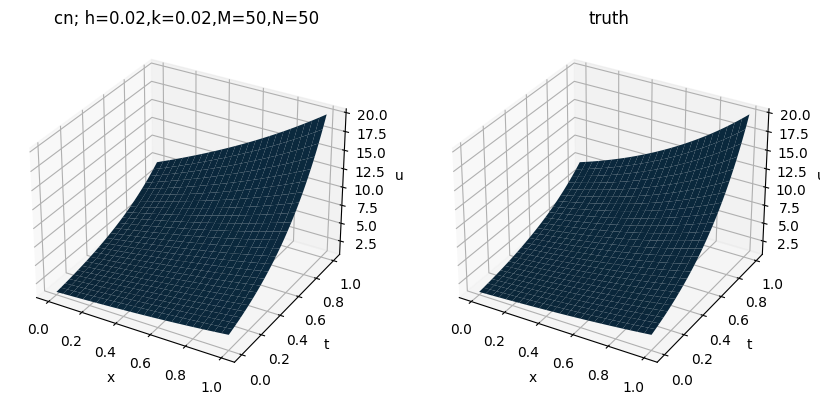

In [ ]:
# sauer, 2nd ed, section 8.1, computer problem 8.1.b ~ adjusted from lecture 24

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# actual
U_act = lambda x,t: np.exp(2*t+x) # from 8.1, exercise 1

# bvp
U = lambda x: np.exp(x)
BCL = lambda x,t: np.exp(2*t)
BCR = lambda x,t: np.exp(2*t+1)

# some parms
D = 4  # diffusion constant

# mesh
x,t = [0,1],[0,1]
h = 0.02
k = 0.02
M = round((x[1]-x[0])/h)
N = round((t[1]-t[0])/k)
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2+2*sigma
a.flat[1::m+1] = a.flat[m::m+1] = -sigma
b = np.zeros((m,m))
b.flat[0::m+1] = 2-2*sigma
b.flat[1::m+1] = b.flat[m::m+1] =  sigma

# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[M,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior % w(:,j+1)=a\(b*w(:,j)+sigma*sides);
for j in range(n):
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1:m+1,j+1] = np.dot(b,ws[1:m+1,j+1])
  ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])
  ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

if False:
  print(ws[0:11,0:6])

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij')
  fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs[0].set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
  #axs[0].plot_wireframe(x,y,ws)
  axs[0].plot_surface(x,y,ws)
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("t")
  axs[0].set_zlabel("u")

  ys = U_act(x,y)
  axs[1].set_title("truth")
  axs[1].plot_surface(x,y,ys)
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("t")
  axs[1].set_zlabel("u")

  plt.show()


##### FINAL 8.1 code problem 1, dataset a.


[[102. -50.   0.   0.]
 [-50. 102. -50.   0.]
 [  0. -50. 102. -50.]
 [  0.   0. -50. 102.]]
[[-98.  50.   0.   0.]
 [ 50. -98.  50.   0.]
 [  0.  50. -98.  50.]
 [  0.   0.  50. -98.]]


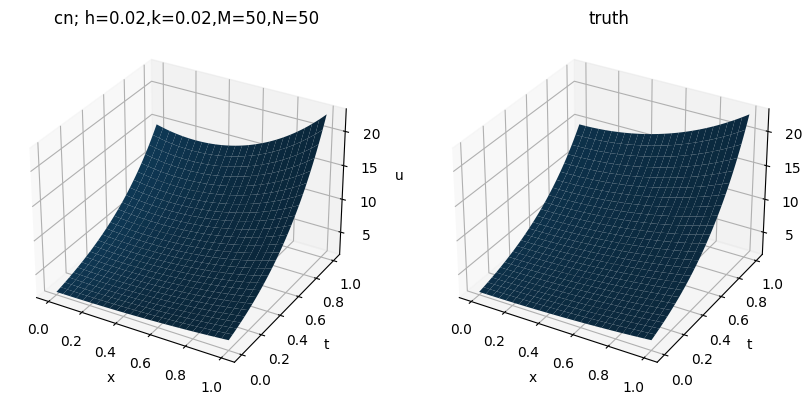

In [ ]:
# sauer, 2nd ed, section 8.1, computer problem 8.1.a

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=4,suppress=True) # ~ matlab vs python

# actual
U_act = lambda x,t: np.exp(2*t+x) + np.exp(2*t-x) # from 8.1, exercise 1

# bvp
U = lambda x: 2*np.cosh(x)
BCL = lambda x,t: 2*np.exp(2*t)
BCR = lambda x,t: (np.exp(2)+1)*np.exp(2*t-1)

# some parms
D = 1  # diffusion constant

# mesh
x,t = [0,1],[0,1]
h = 0.02
k = 0.02
M = round((x[1]-x[0])/h)
N = round((t[1]-t[0])/k)
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma = D*k/pow(h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2+2*sigma
a.flat[1::m+1] = a.flat[m::m+1] = -sigma
b = np.zeros((m,m))
b.flat[0::m+1] = 2-2*sigma
b.flat[1::m+1] = b.flat[m::m+1] =  sigma

print(a[0:4,0:4])
print(b[0:4,0:4])

# approx soln, initialize
ws = np.zeros((M+1,N+1)) # [0:M,0:N]

# approx soln, bc
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[M,:] = BCR(x[1],ts)

# approx soln, ic
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic

# approx soln, calc interior % w(:,j+1)=a\(b*w(:,j)+sigma*sides);
for j in range(n):
  ws[1:m+1,j+1] = ws[1:m+1,j]
  ws[1:m+1,j+1] = np.dot(b,ws[1:m+1,j+1])
  ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])
  ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])
  ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

if False:
  print(ws[0:11,0:6])

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij')
  fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs[0].set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
  #axs[0].plot_wireframe(x,y,ws)
  axs[0].plot_surface(x,y,ws)
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("t")
  axs[0].set_zlabel("u")

  ys = U_act(x,y)
  axs[1].set_title("truth")
  axs[1].plot_surface(x,y,ys)
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("t")
  axs[1].set_zlabel("u")

  plt.show()
